#### 一、自然语言处理基础

##### 1.1、自然语言处理的根本任务是什么？

让计算机理解我们人类的语言！

##### 1.2、计算机是怎么理解人类的自然语言的？

自然语言 ==》 单词  ==》 数值向量 ==》上下文理解 ==》具体任务模型参数学习！

##### 1.3、什么是软语言？什么是硬语言？

硬语言：编程语言就是，机械的缺乏活力的语言，哈哈。
软语言：不同语境相同表述不同含义，新词持续诞生

##### 1.4、自然语言处理技术在当今的时代有什么成熟的应用？有什么前沿的应用方向？

> 自然语言处理技术在当今的成熟应用包括：

1. **智能助手**：如Siri、Alexa，用于语音识别和对话系统。
2. **机器翻译**：如Google翻译，实现多语言即时翻译。
3. **文本生成**：如ChatGPT，生成自然语言回答或内容。
4. **情感分析**：用于社交媒体、客户反馈等领域分析情绪。
5. **信息检索**：如搜索引擎，提升信息查询的精准度。

这些应用改变了人机交互、全球通信和数据处理的效率。

> 自然语言处理技术在未来的探索方向包括：

1. **医疗诊断与健康助手**：通过分析病历、对话和研究文献，辅助医生诊断或为患者提供个性化健康建议。
  
2. **法律与合同审查**：自动分析和生成法律文书、合同审查，减少人工工作量。

3. **金融智能分析**：实时解读市场新闻、分析金融报告，自动化投资决策或风险管理。

4. **自动化科研助理**：帮助科学家整理、归纳海量学术论文或生成新研究思路。

5. **虚拟教育助理**：智能答疑、个性化教学，提供更沉浸式的学习体验。

这些方向将进一步拓展NLP在专业领域的深度应用。

> 开个脑洞


1. **脑机接口（BCI）与语言理解**：通过直接解码大脑信号，将思维转化为语言，实现“思维交互”，无需物理输入设备。

2. **情感增强虚拟现实（VR/AR）**：结合NLP和情感计算，创造能感知并回应用户情绪的虚拟角色，打造更加自然的沉浸式体验。

3. **AI驱动的社会治理**：通过分析社会舆情、政策文本，提供智能化的公共决策建议，促进社会问题的前瞻性解决。

4. **跨物种交流**：运用NLP技术尝试解读动物或外星生命的信号，探索与非人类生命形式的“语言”互动。

5. **完全自主的虚拟人格**：创造拥有自主学习能力、情感认知与社会行为的虚拟人类，推动人与虚拟存在的深度共生。

这些方向更具未来感，将重新定义人机交互的边界。

##### 1.5、为什么研究NLP一开始人类要先研究单词呢？


我们的语言是由文字构成的，而语言的含义是由单词构成的。换句话说，*单词是含义的最小单位。*因此，为了让计算机理解自然语言，让它理解单词含义可以说是最重要的事情了。

#### 二、同义词词典

##### 2.1、什么是WordNet？有什么用？有什么问题？

> 是什么？

- 本质：根据各单词的含义，基于上位 - 下位关系形成的图，目的是根据这个人工定义的网络来计算单词之间的相似度！
![](./attachements/WordNet构建示意图.png)

- NLTK模块中有一个WordNet是是普林斯顿大学于 1985 年开始开发的同义词词典，超过20万个单词
> 有什么用？

- 根据WordNet计算单词之间的相似度！

> 有什么问题？
- 人力成本高 + 无法表示单词之间的微妙变化

##### 2.2、怎么从海量的文本数据中自动提取单词含义，以解放人们从人工关联单词的痛苦工作？

1. **基于计数的方法**：通过统计单词在不同上下文中的共现频率（如TF-IDF、共现矩阵），自动推测单词含义。它利用词与其他词的共现信息生成语义关系，无需手动定义词义。

2. **基于神经网络的推理方法**：利用深度学习模型（如Word2Vec、BERT），通过大规模语料训练网络，自动学习词的向量表示。模型根据上下文推理出单词的含义，替代了人工标注和关联词义的工作。

这两种方法通过自动化的数据驱动方式，快速且高效地构建单词的语义关联，避免人工处理。

#### 三、基于计数的方法

##### 3.1、什么是语料库？

语料库（corpus）: 语料库就是一个**由大量人类写的文本组成的数据库**，它记录了人们使用语言的方式，包括词的使用和句子的结构。通过分析这些文本，机器可以从中学到语言的规则和词的含义，而不需要人工标注。

##### 3.2、基于计数的方法整体实现思路是什么？

使用语料库，计算上下文中的单词数量，将它们转化 PPMI 矩阵，再基于 SVD 降维获得好的单词向量。这就是单词的分布式表示，每个单词表示为固定长度的密集向量。

##### 3.4、语料库的预处理需要做什么？

In [7]:
import re
import numpy as np

def preprocess(text: str):
    text = text.lower()
    # text = re.split('(\W+)?', text) 
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


##### 3.5、单词的分布式表示是什么意思？

单词的分布式表示就等同于颜色的RGB表示：本质是将单词表示为固定长度的密集向量表示！

- RGB(220, 1, 1)一看就知道是红色系的哈哈
- 密集向量：就是组成向量的大多数元素都非零

##### 3.6、什么是分布式假设？什么是单词的上下文？

- 分布式假设：就是一个想法"某个单词的含义由它周围的单词形成"
- 单词的上下文：滑动窗口slid_window就是上下文的具象算法表现

##### 3.7、什么是共现矩阵？

- 共现矩阵：就是基于计数的方法的，这是一个东西！**本质是计算每个单词的上下文所包含的单词的频数！**

![](./attachements/单词you的上下文.png)
![](./attachements/单词you的上下文中包含的单词频数.png)
![](./attachements/单词say的上下文频数.png)
![](./attachements/汇总各单词上下文频数.png)

In [8]:
# 求共线矩阵

def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i
            
            # 检查左侧窗口
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            
            # 检查右侧窗口
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    
    return co_matrix  # 确保在整个循环完成后才返回



##### 3.8、怎么度量两个向量间的相似度？

> 余弦相似度直观地表示了“两个向量在多大程度上指向同一方向”。两个向量完全指向相同的方向时，余弦相似度为 1；完全指向相反的方向时，余弦相似度为 −1。

$$
\operatorname{similarity}(\boldsymbol{x}, \boldsymbol{y})=\frac{\boldsymbol{x} \cdot \boldsymbol{y}}{\|\boldsymbol{x}\|\|\boldsymbol{y}\|}=\frac{x_{1} y_{1}+\cdots+x_{n} y_{n}}{\sqrt{x_{1}^{2}+\cdots+x_{n}^{2}} \sqrt{y_{1}^{2}+\cdots+y_{n}^{2}}}
$$




In [9]:
# def cos_similarity(x, y):
#     nx = x / np.sqrt(np.sum(x**2)) # x 的正规化
#     ny = y / np.sqrt(np.sum(y**2)) # y 的正规化
#     return np.dot(nx, ny)

# 一般放置除数为0我们就加个微小量1e-8
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [10]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
c0 = C[word_to_id['you']] # you 的单词向量
c1 = C[word_to_id['i']] # i 的单词向量

print(C)
print(cos_similarity(c0, c1))

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
0.7071067691154799


#### 四、基于计数的方法的问题驱动演进

##### 4.1、基于计数的方法中根据余弦相似度计算向量间的相似度有什么问题？

> 答：比如，我们来考虑某个语料库中 the 和 car 共现的情况。在这种情况下，我们会看到很多“...the car...”这样的短语。因此，它们的共现次数将会很大。另外，car 和 drive 也明显有很强的相关性。但是，如果只看单词的出现次数，那么与 drive 相比，the 和 car 的相关性更强。这意味着，仅仅因为 the 是个常用词，它就被认为与 car 有很强的相关性。

In [11]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # ❶ 取出查询词
    if query not in word_to_id:
        print('%s is not found' % query)
        return
    
    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # ❷ 计算余弦相似度
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # ❸ 基于余弦相似度，按降序输出值
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [12]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


- 你看上面的相似单词的排序代码实现结果，i我可以理解因为都是人称代词，那为毛跟goodbye还有hello都近呢？ ==》 一个可能的原因是，这里的语料库太小了！！！

##### 4.2、PPMI（点互信息）矩阵怎么求？又带来了什么问题？

$$
\operatorname{PMI}(x, y)=\log _{2} \frac{P(x, y)}{P(x) P(y)}=\log _{2} \frac{\frac{\boldsymbol{C}(x, y)}{N}}{\frac{\boldsymbol{C}(x)}{N} \frac{\boldsymbol{C}(y)}{N}}=\log _{2} \frac{\boldsymbol{C}(x, y) \cdot N}{\boldsymbol{C}(x) \boldsymbol{C}(y)}
$$

> 正的点互信息：因为点互信息当两个单词的共现次数为 0 时，$log_{2}0 = -\infty $

$$
PPMI(x, y) = max(0, PMI(x, y)) 
$$

In [13]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)
            if verbose:
                cnt += 1
                if cnt % (total//100+1) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M    

In [14]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)
np.set_printoptions(precision=3) # 有效位数为 3位
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]



问题：
- 随着语料库的词汇量增加，各个单词向量的维度会高的离谱
- PPMI矩阵是稀疏矩阵，为0的元素很多，也就意味着每个真正的”信息元素“话语权小，容易受噪声影响，稳健性差

##### 4.3、怎么从稀疏向量中找出重要的轴，用更少的维度对其进行重新表示？

![](./attachements/降维示意图-找到数据分布广的轴.png)

##### 4.4、为什么基于SVD的奇异值分解降维有用？

![](./attachements/SVD分解-原矩阵.png)
![](./attachements/SVD分解-取密集矩阵.png)

矩阵 S 的奇异值小，对应的基轴的重要性低，因此，可以通过去除矩阵 U 中的多余的列向量来近似原始矩阵。

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17]
[ 3.409e-01 -1.110e-16]


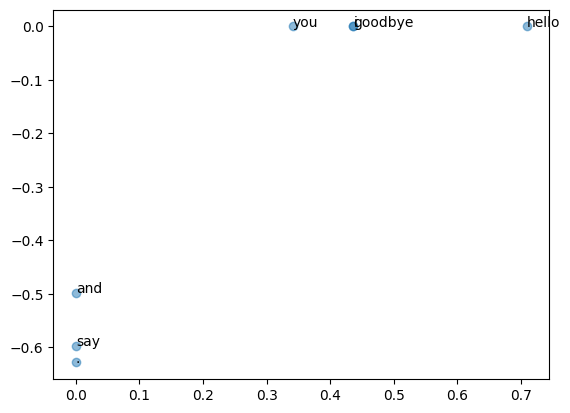

In [15]:
import matplotlib.pyplot as plt

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)
# SVD
U, S, V = np.linalg.svd(W)

print(C[0]) # 共现矩阵
print(W[0]) # PPMI 矩阵
print(U[0]) # SVD
print(U[0, :2]) # 降维到二维向量，取出前两个元素即可。


for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

goodbye 和 hello、you 和 i 位置接近，这是比较符合我们的直觉的。但是，因为我们使用的语料库很小，有些结果就比较微妙。

##### 4.5、Truncated SVD是为了解决什么问题的？

- 因为SVD的计算复杂度是$O(n^3)$, sklearn.utils.extmath import randomized_svd就是一种Truncated SVD  == 》 仅对奇异值较大的部分进行计算，计算速度比常规的 SVD 快



##### 4.6、换PTB语料库



In [16]:
# NLTK中载入不是符合我们上面的corpub word_2_id id_2_word 转一下

import nltk
from collections import defaultdict
import numpy as np
import os
import pickle

# 下载并加载 PTB 语料库
nltk.download('treebank')
from nltk.corpus import treebank

# 创建目录用于保存数据
dataset_dir = './data'  # 你可以自定义路径
os.makedirs(dataset_dir, exist_ok=True)

vocab_file = os.path.join(dataset_dir, 'ptb.vocab.pkl')

def load_vocab():
    if os.path.exists(vocab_file):
        with open(vocab_file, 'rb') as f:
            word_to_id, id_to_word = pickle.load(f)
        return word_to_id, id_to_word

    word_to_id = {}
    id_to_word = {}

    # 从 PTB 语料库获取所有单词
    words = [word.lower() for sentence in treebank.sents() for word in sentence]

    for word in words:
        if word not in word_to_id:
            word_id = len(word_to_id)
            word_to_id[word] = word_id
            id_to_word[word_id] = word

    with open(vocab_file, 'wb') as f:
        pickle.dump((word_to_id, id_to_word), f)

    return word_to_id, id_to_word

def load_data():
    word_to_id, id_to_word = load_vocab()

    # 创建语料
    words = [word.lower() for sentence in treebank.sents() for word in sentence]
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

if __name__ == '__main__':
    corpus, word_to_id, id_to_word = load_data()
    print("Corpus size:", len(corpus))
    print("Vocabulary size:", len(word_to_id))


[nltk_data] Downloading package treebank to
[nltk_data]     /Users/xiaomengli/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Corpus size: 100676
Vocabulary size: 11387


In [17]:
window_size = 2
wordvec_size = 100
# corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('counting co-occurrence ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('calculating PPMI ...')
W = ppmi(C, verbose=True)
print('calculating SVD ...')
try:
    # truncated SVD (fast!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
    random_state=None)
except ImportError:
    # SVD (slow)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

counting co-occurrence ...
calculating PPMI ...
1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0